In [39]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv(r"E:\PYTHON\DATA SCIENCE PROJECT\GOLD\gold_monthly_csv.csv")


In [41]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [42]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [43]:
df.shape

(847, 2)

In [44]:
print(f"date range - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

date range - 1950-01 to 2020-07


In [45]:
date=pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')


In [46]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [47]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


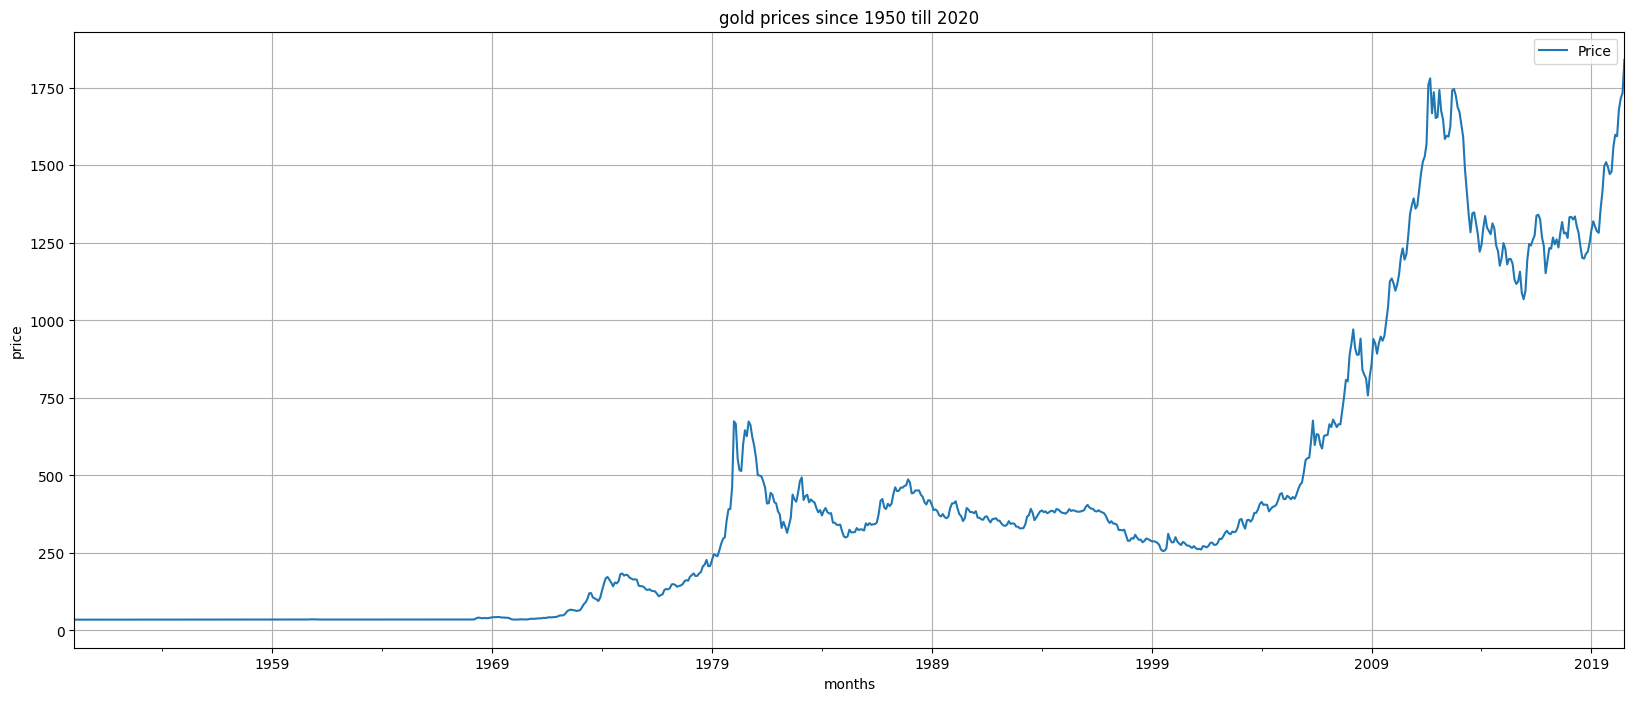

In [48]:
df.plot(figsize=(20,8))
plt.title('gold prices since 1950 till 2020')
plt.xlabel('months')
plt.ylabel('price')
plt.grid();

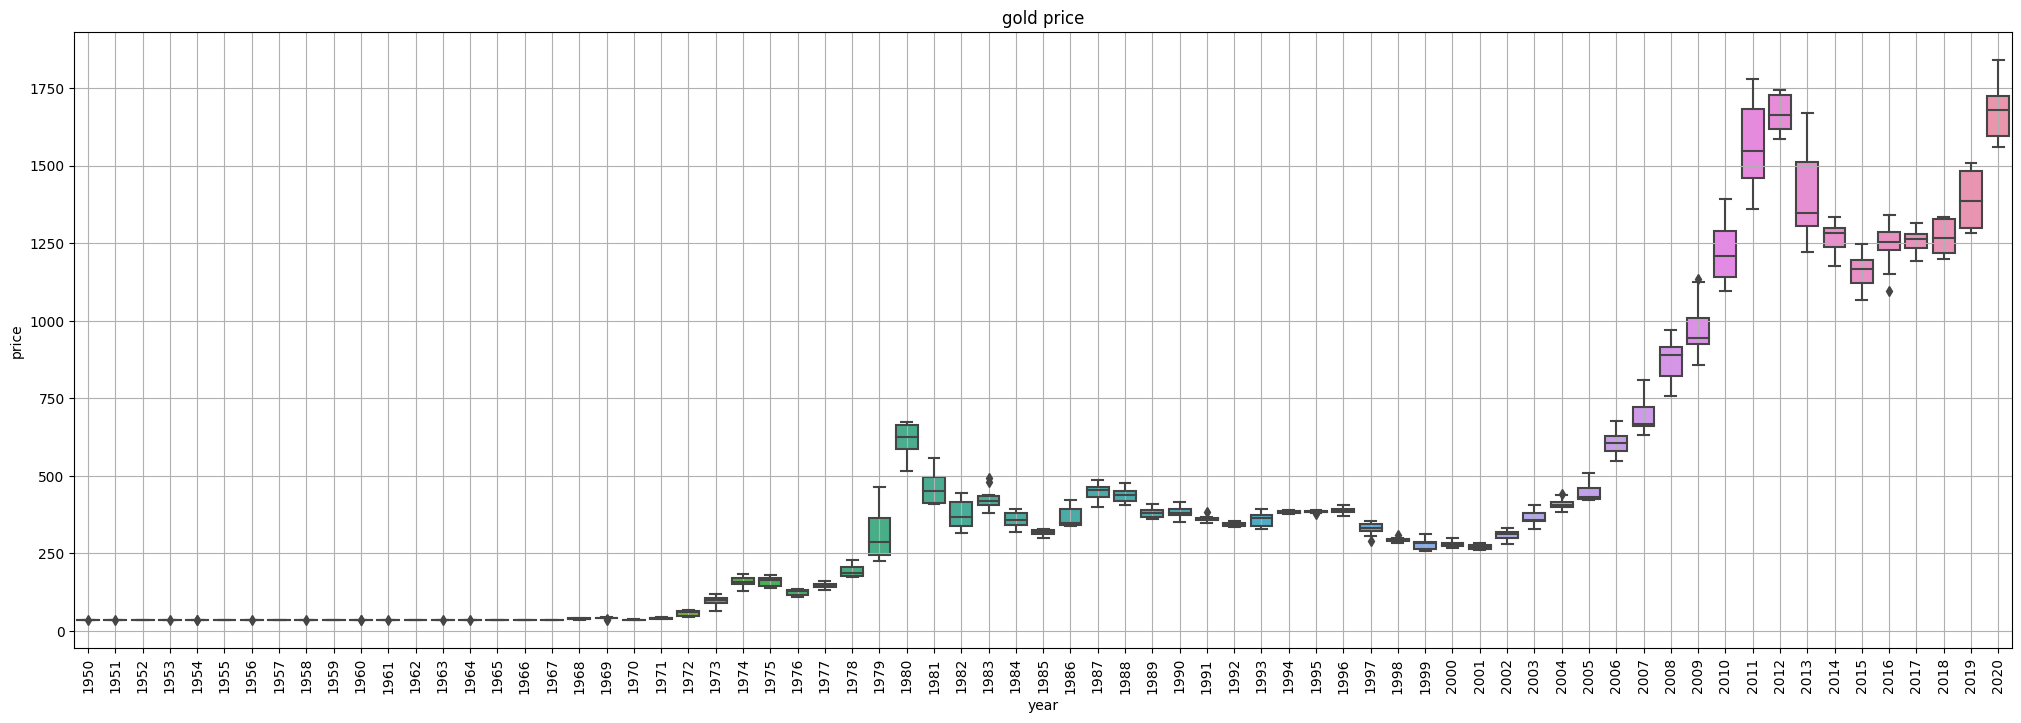

In [49]:
_, ax= plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year,y=df.values[:,0],ax=ax)
plt.title('gold price')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

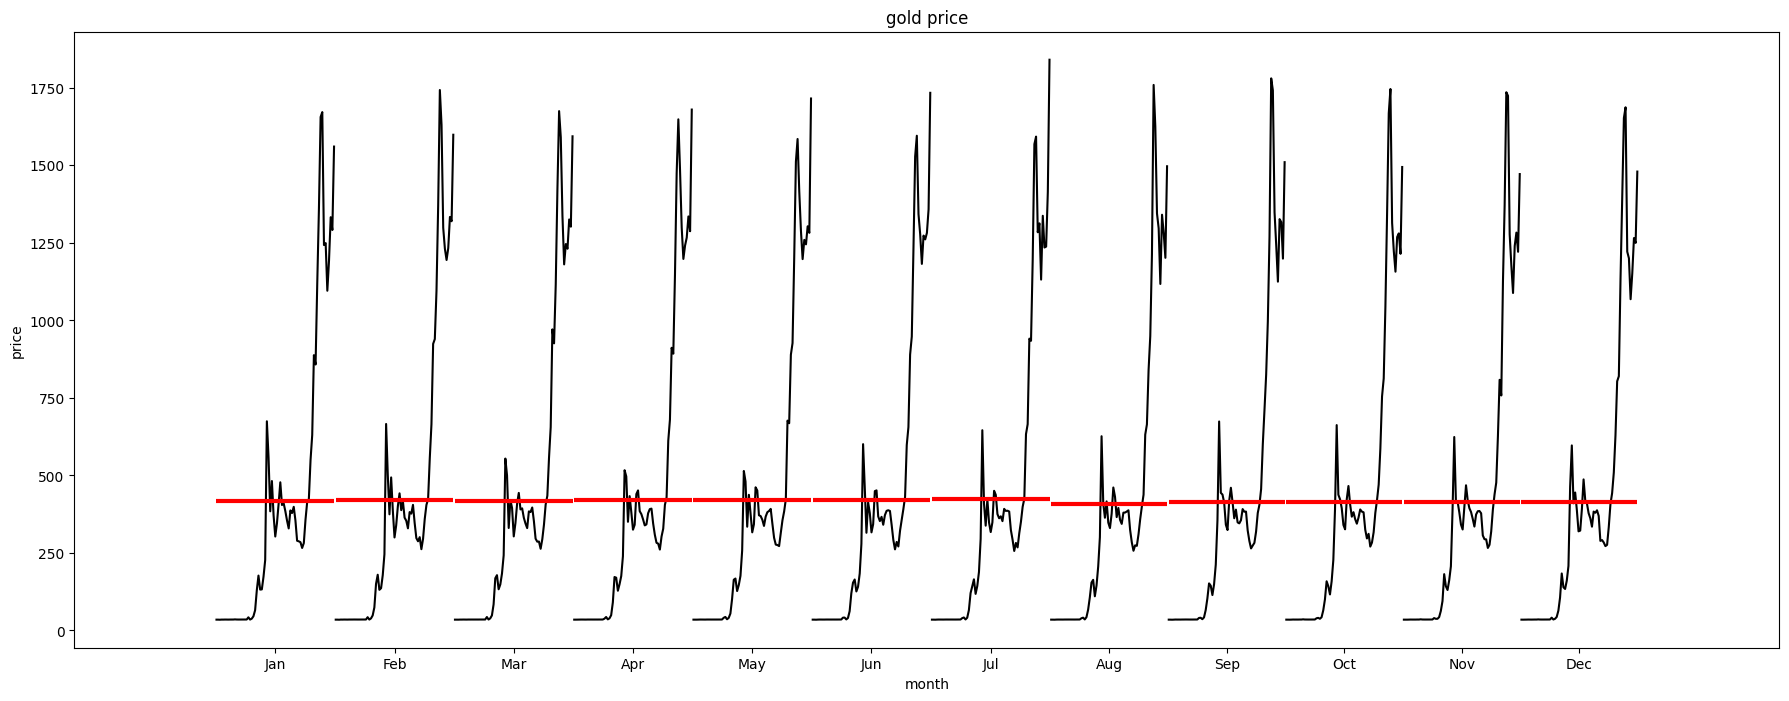

In [50]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel='gold price',ax=ax)
plt.title('gold price')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

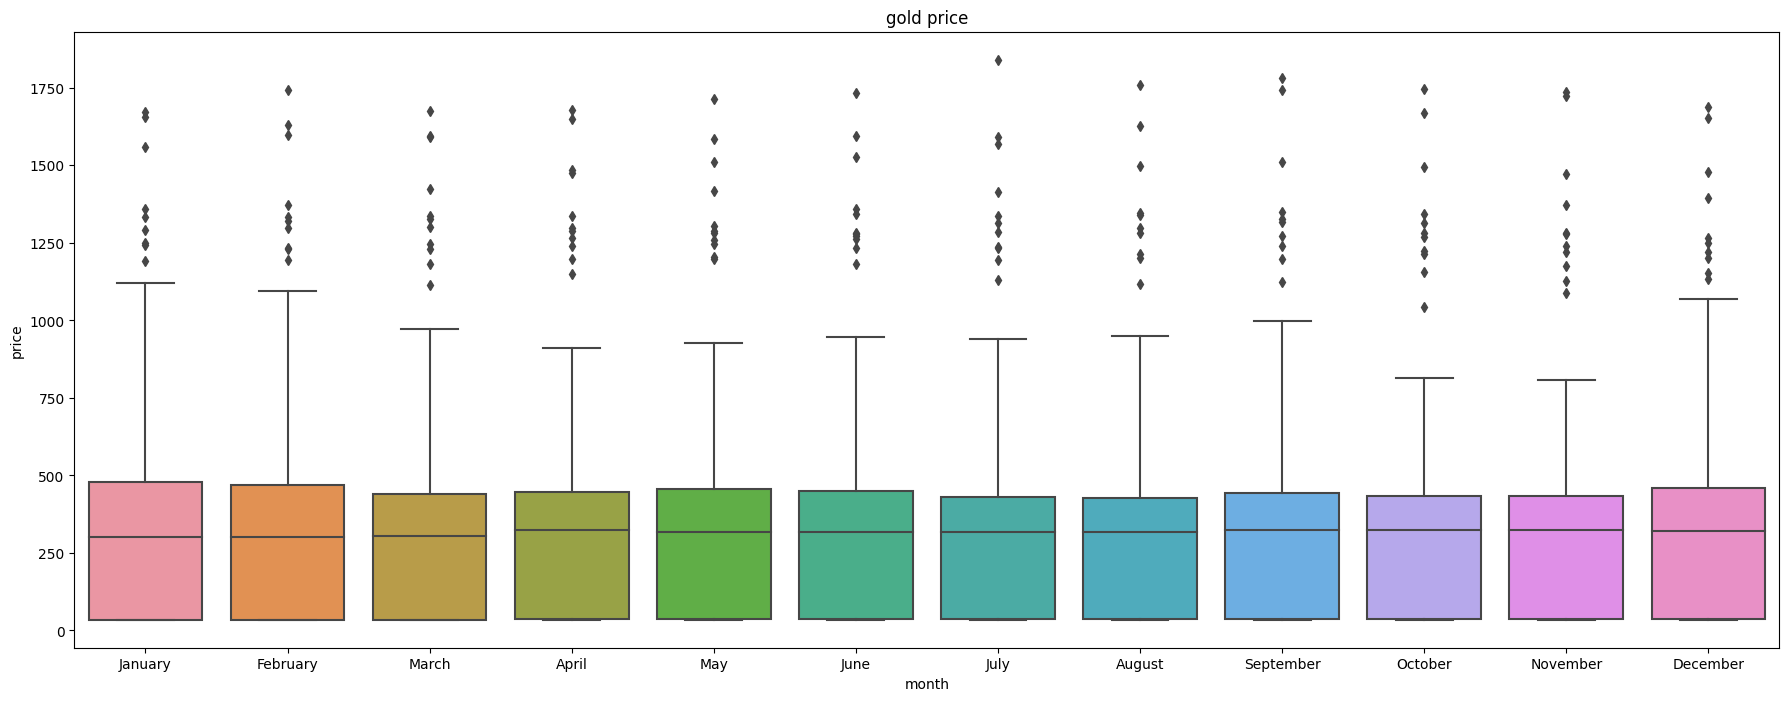

In [51]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title('gold price')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

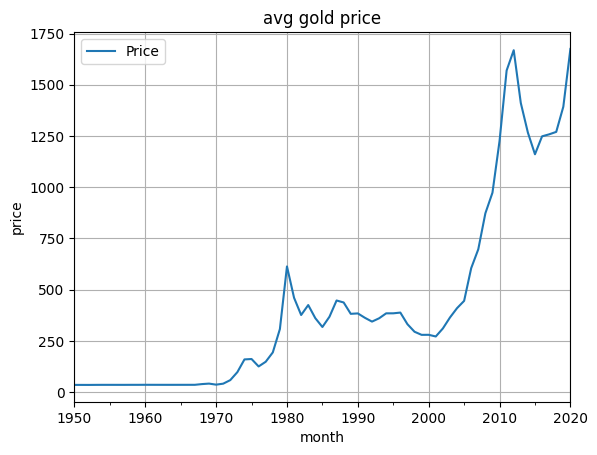

In [52]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot();
plt.title('avg gold price')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()


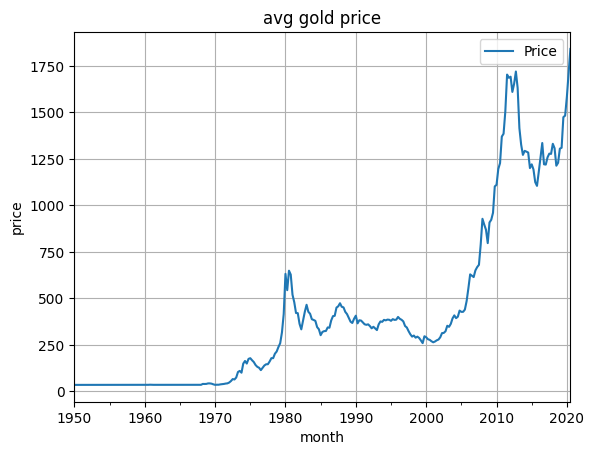

In [53]:
df_Quater_sum=df.resample('Q').mean()
df_Quater_sum.plot();
plt.title('avg gold price')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

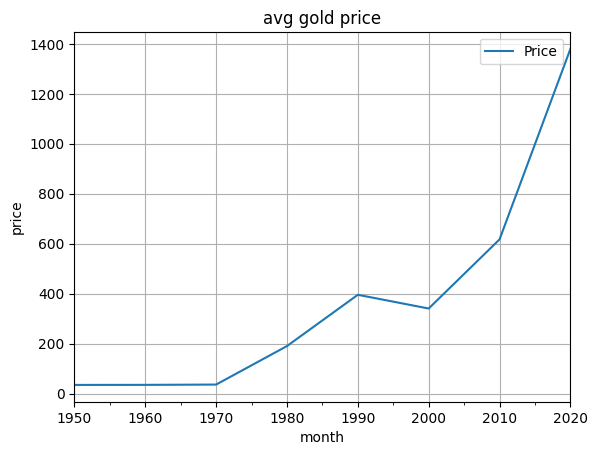

In [54]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('avg gold price')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

In [55]:
train=df[df.index.year <= 2017]
test=df[df.index.year > 2017]


In [56]:
print(test.shape)
print(train.shape)

(31, 1)
(816, 1)


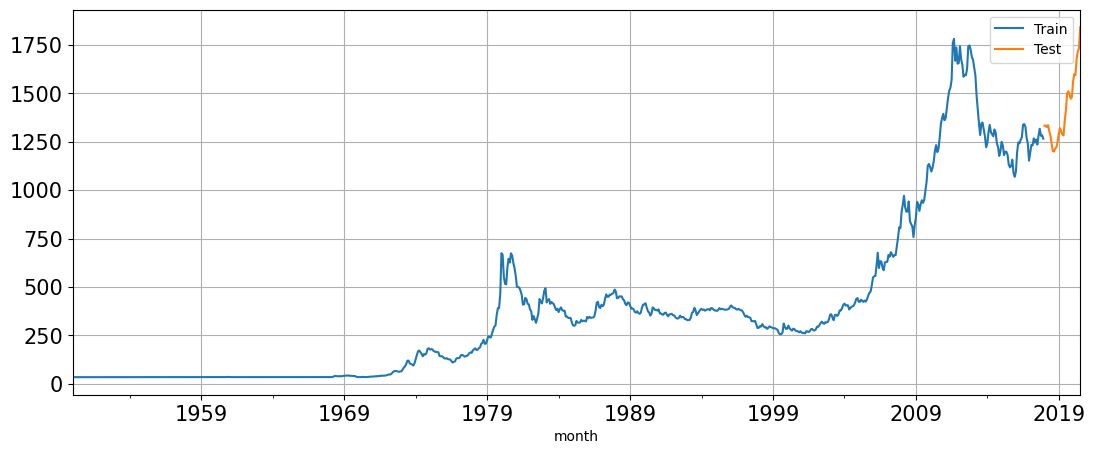

In [57]:
train["Price"].plot(figsize=(13,5),fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(["Train","Test"])
plt.show()

# linear regression

In [58]:
train_time=[i+1 for i in range (len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(816, 31)

In [59]:
LR=train.copy()
LR1=test.copy()

In [60]:
LR['time']=train_time
LR1['time']=test_time

In [61]:
lr=LinearRegression()
lr.fit(LR[['time']],LR['Price'].values)

LinearRegression()

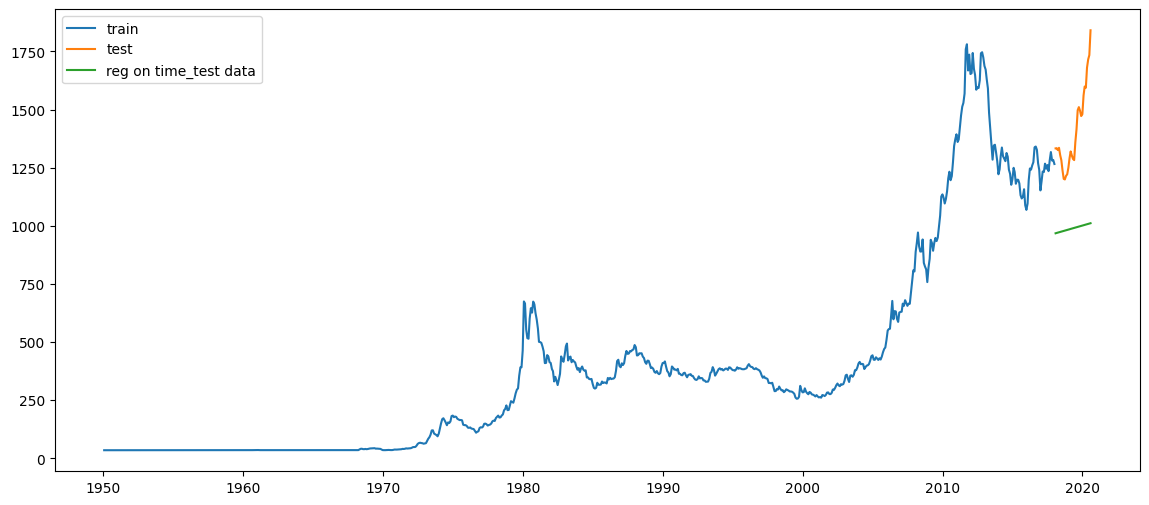

In [62]:
test_predictions_model1=lr.predict(LR1[['time']])
LR1['forecast']=test_predictions_model1 
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR1['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid;

In [63]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred )/ actual))*100,2)

In [64]:
mape_model1_test=mape(test['Price'].values, test_predictions_model1)
print("mape is %3.f"%(mape_model1_test),"%")

mape is  29 %


In [65]:
results=pd.DataFrame({'Test mape':[mape_model1_test]},index=["RegressionOntime"])
results

,Test mape
RegressionOntime,28.88


In [66]:
N_train=train.copy()
N_test=test.copy()

N_test['naive']=np.asarray(train['Price'])[len(np.asarray(train["Price"]))-1]
N_test['naive'].head()

month
2018-01-31    1265.674
2018-02-28    1265.674
2018-03-31    1265.674
2018-04-30    1265.674
2018-05-31    1265.674
Name: naive, dtype: float64

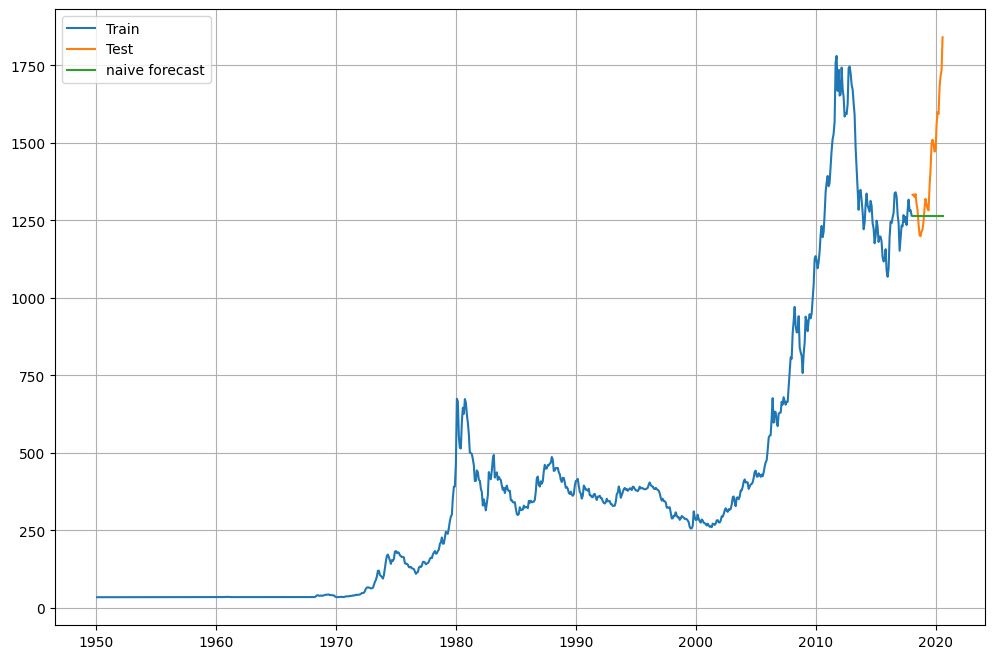

In [67]:
plt.figure(figsize=(12,8))
plt.plot(N_train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(N_test['naive'],label='naive forecast')
plt.legend(loc='best')
plt.grid()

In [68]:
mape_model2_test=mape(test['Price'].values,N_test['naive'].values)
print((mape_model2_test))

10.34


In [69]:
resultsDf_2=pd.DataFrame({'Test mape(%)':[mape_model2_test]},index=["Naive model"])
resultsDf_2

,Test mape(%)
Naive model,10.34


In [70]:
final_model= ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.4,
                                                           smoothing_trend=0.3,
                                                           smoothing_seasonal=0.6)

In [71]:
final_model

In [72]:
Mape_final_model=mape(df['Price'].values, final_model.fittedvalues)
print("Mape :",Mape_final_model)

Mape : 17.24


In [73]:
prediction=final_model.forecast(steps=len(test))

In [74]:
prediction

2020-08-31    1792.870894
2020-09-30    1723.456606
2020-10-31    1646.718094
2020-11-30    1584.908404
2020-12-31    1567.476763
2021-01-31    1622.566821
2021-02-28    1653.501465
2021-03-31    1664.913401
2021-04-30    1756.458890
2021-05-31    1802.375060
2021-06-30    1851.551316
2021-07-31    1904.257679
2021-08-31    1893.186553
2021-09-30    1823.772265
2021-10-31    1747.033753
2021-11-30    1685.224062
2021-12-31    1667.792421
2022-01-31    1722.882480
2022-02-28    1753.817124
2022-03-31    1765.229059
2022-04-30    1856.774549
2022-05-31    1902.690719
2022-06-30    1951.866975
2022-07-31    2004.573337
2022-08-31    1993.502212
2022-09-30    1924.087924
2022-10-31    1847.349412
2022-11-30    1785.539721
2022-12-31    1768.108080
2023-01-31    1823.198139
2023-02-28    1854.132783
Freq: M, dtype: float64

In [75]:
pred_df=pd.DataFrame({'lower_CI' : prediction -1.96 *np.std(final_model.resid,ddof=1),
                      'Prediction' : prediction,
                      'upper_CI' : prediction +1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,Prediction,upper_CI
2020-08-31,1684.719922,1792.870894,1901.021866
2020-09-30,1615.305634,1723.456606,1831.607579
2020-10-31,1538.567122,1646.718094,1754.869067
2020-11-30,1476.757432,1584.908404,1693.059376
2020-12-31,1459.325790,1567.476763,1675.627735


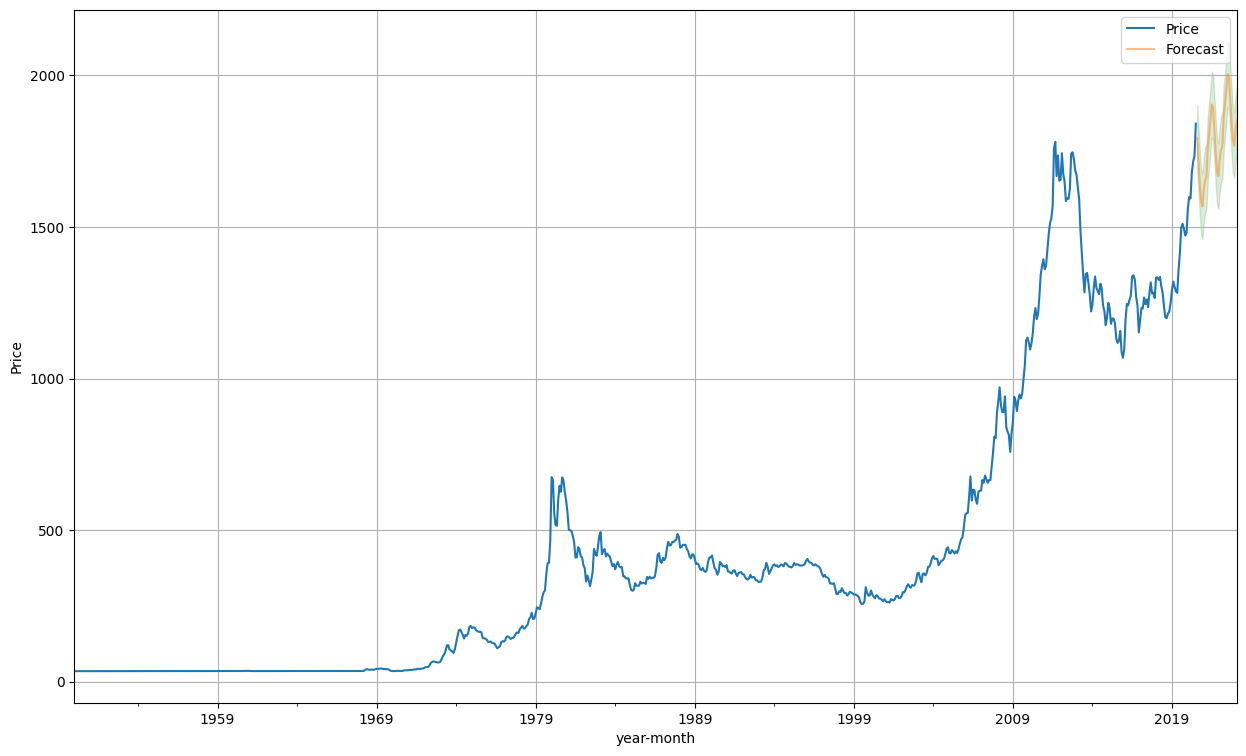

In [76]:
axis=df.plot(label='Actual',figsize=(15,9))
pred_df['Prediction'].plot(ax=axis,label="Forecast",alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'],pred_df['upper_CI'],color='g',alpha=0.15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()